<a href="https://colab.research.google.com/github/SharanIO/Reinforcement-Learning/blob/main/sthiruna_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium matplotlib numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

Below is an example of the visualization of the grid world created using matplotlib.

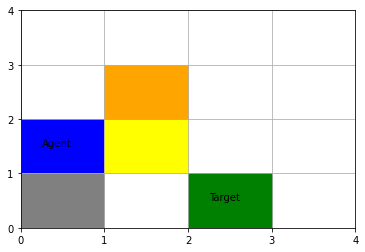

In [ ]:
x = np.linspace(0,4,5)
y = np.linspace(0,4,5)
fig = plt.figure()
ax = fig.add_subplot(111)
x1=np.random.randint(3)
y1=np.random.randint(3)
agent = patches.Rectangle((x1,y1),1, 1,color ='blue')#agent_pos
plt.annotate("Agent",(x1+0.25,y1+0.5))
x2=np.random.randint(3)
y2=np.random.randint(3)
target = patches.Rectangle((x2, y2),1, 1,color ='green')#goal_pos
plt.annotate("Target",(x2+0.25,y2+0.5))
reward1 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='yellow')#goal_pos
reward2 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='red')#goal_pos
reward3 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='grey')#goal_pos
reward4 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='orange')#goal_pos
ax.set_facecolor("white")
ax.add_patch(agent)
ax.add_patch(target)
ax.add_patch(reward1)
ax.add_patch(reward2)
ax.add_patch(reward3)
ax.add_patch(reward4)

#plt.axis([0,4,0,4])
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])
plt.grid()
plt.show()
plt.pause(1)
plt.close()


In [ ]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

A grid world is created using gymnasium. The stochastic environment considers the desired action 90% of the time and considers a random action 10% of the time.

In [ ]:
class MyGridWorldEnv(gym.Env):
  metadata = { 'render.modes': [] }
  
  def __init__(self,environment_type):
    self.observation_space = spaces.Discrete(16) # Observation space has 16 states
    self.action_space = spaces.Discrete(4) # Action space has 4 states
    self.max_timesteps = 10 # Number of steps the agent takes

    self.timestep = 0 # Initial timestep
    self.agent_pos = [0, 0] # Initial position of the agent
    self.goal_pos = [3, 3] # Position of the target
    self.reward_pos = [[1,1],[2,3],[0,3],[3,0]] #Custom positions of the rewards
    self.obs_all = {"agent": self.agent_pos, "target": self.goal_pos} 
    self.environment_type = environment_type #Deterministic or Stochastic

  def step(self,action):
    if self.environment_type == "deterministic":
      if action == 0:
        self.agent_pos[0] += 1 #up
      if action == 1:
        self.agent_pos[0] -= 1 #down
      if action == 2:
        self.agent_pos[1] += 1 #right
      if action == 3:
        self.agent_pos[1] -= 1 #left

    if self.environment_type == "stochastic":
      print("actual value",action)
      if np.random.random()<0.9:
        if action == 0:
          self.agent_pos[0] += 1 #up
        if action == 1:
          self.agent_pos[0] -= 1 #down
        if action == 2:
          self.agent_pos[1] += 1 #right
        if action == 3:
          self.agent_pos[1] -= 1 #left
      else:
        action = np.random.choice(self.action_space.n)
        print("Change in value",action)
        if action == 0:
          self.agent_pos[0] += 1 #up
        if action == 1:
          self.agent_pos[0] -= 1 #down
        if action == 2:
          self.agent_pos[1] += 1 #right
        if action == 3:
          self.agent_pos[1] -= 1 #left

    self.agent_pos = np.clip(self.agent_pos, 0, 2)
    self.obs_all = {"agent": self.agent_pos, "target": self.goal_pos}
    observation = self.obs_all

    #Add more rewards and penalities
    reward = 0
    if np.array_equal(self.agent_pos, self.goal_pos):
      reward = 10 #green
    if np.array_equal(self.agent_pos, self.reward_pos[0]):
      reward = 5 #yellow
    if np.array_equal(self.agent_pos, self.reward_pos[1]):
      reward = -3 #red
    if np.array_equal(self.agent_pos, self.reward_pos[2]):
      reward = 2 #grey
    if np.array_equal(self.agent_pos, self.reward_pos[3]):
      reward = 1 #orange

    
    self.timestep += 1
    terminated = True if self.timestep >= self.max_timesteps else False #terminates at after max timesteps
    truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 3)) else False #Allows the agent to not exit the environment boundary

    info = {}
        
    return observation, reward, terminated, truncated, info

  def reset(self):
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.obs_all = {"agent": self.agent_pos, "target": self.goal_pos}
    observation = self.obs_all

    info = {}

    return observation, info

  def render(self,obs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    robot = patches.Rectangle(tuple(obs["agent"]),1, 1,color ='blue')#agent_pos
    target = patches.Rectangle(tuple(obs["target"]),1, 1,color ='green')#goal_pos
    reward1 = patches.Rectangle(tuple(self.reward_pos[0]),1, 1,color ='yellow')#5_pos
    reward2 = patches.Rectangle(tuple(self.reward_pos[1]),1, 1,color ='red')#-3_pos
    reward3 = patches.Rectangle(tuple(self.reward_pos[2]),1, 1,color ='grey')#2_pos
    reward4 = patches.Rectangle(tuple(self.reward_pos[3]),1, 1,color ='orange')#1_pos
    ax.set_facecolor("white")
    ax.add_patch(robot)
    ax.add_patch(target)
    ax.add_patch(reward1)
    ax.add_patch(reward2)
    ax.add_patch(reward3)
    ax.add_patch(reward4)

    #plt.axis([0,4,0,4])
    plt.xticks([0,1,2,3,4])
    plt.yticks([0,1,2,3,4])
    plt.grid()
    plt.show()
    plt.pause(1)
    plt.close()

A Random agent is created whose desired actions are random

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

The random agent is implemented in the deterministic environment.

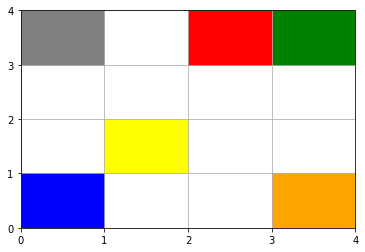

1
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


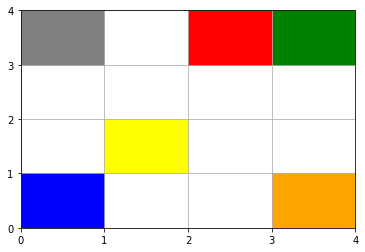

3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


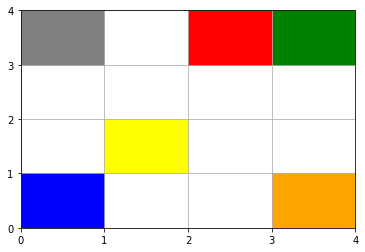

3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


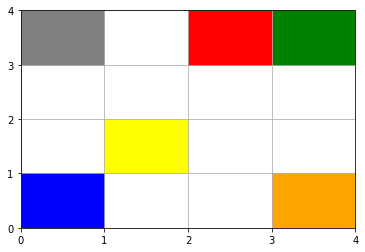

2
{'agent': array([0, 1]), 'target': [3, 3]}
reward 0
total reward 0


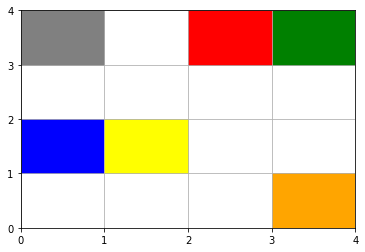

3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


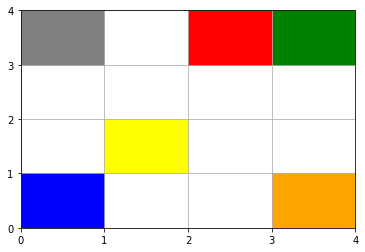

3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


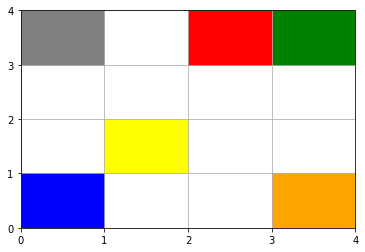

3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


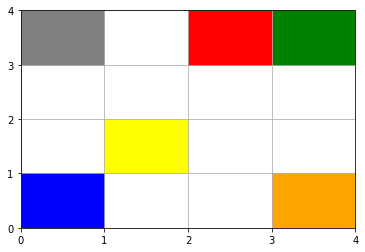

1
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


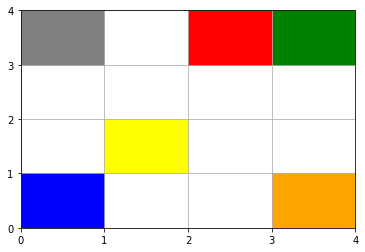

2
{'agent': array([0, 1]), 'target': [3, 3]}
reward 0
total reward 0


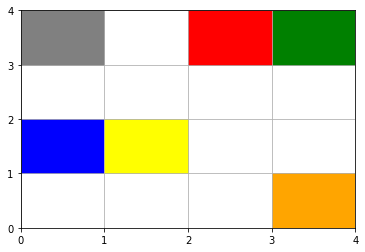

3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total reward 0


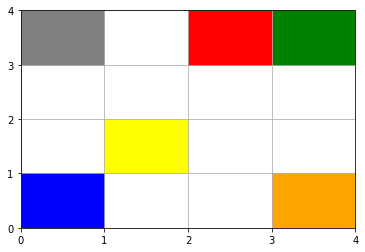

In [ ]:
env = MyGridWorldEnv("deterministic")
agent = RandomAgent(env)

obs, info = env.reset()
env.render(obs)
terminated, truncated = False, False
total_reward = 0
while not terminated:
  action = agent.step(obs)
  print(action)
  obs, reward, terminated, truncated, info = env.step(action)
  total_reward = total_reward + reward
  print(obs)
  print("reward",reward)
  print("total reward",total_reward)
  env.render(obs)



The random is agent is implemented in the stochastic environment.

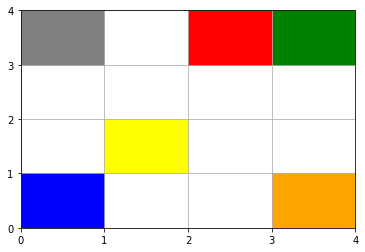

3
actual value 3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total_reward 0


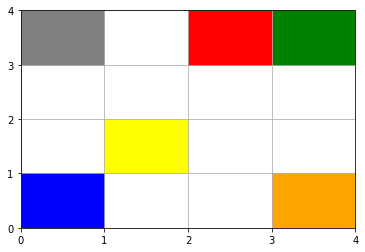

3
actual value 3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total_reward 0


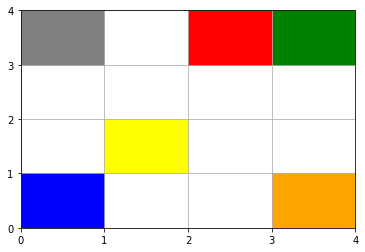

2
actual value 2
{'agent': array([0, 1]), 'target': [3, 3]}
reward 0
total_reward 0


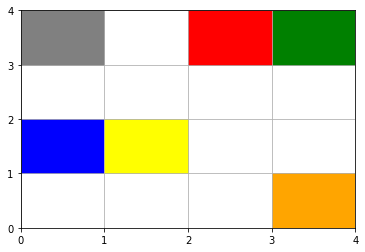

3
actual value 3
{'agent': array([0, 0]), 'target': [3, 3]}
reward 0
total_reward 0


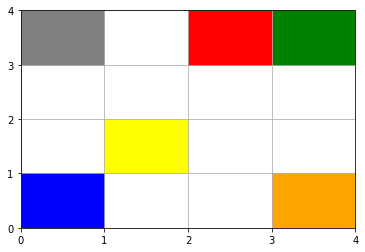

0
actual value 0
{'agent': array([1, 0]), 'target': [3, 3]}
reward 0
total_reward 0


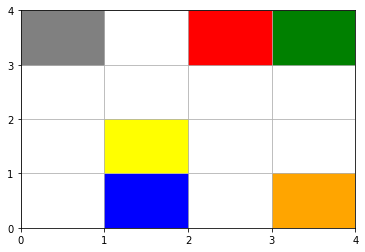

3
actual value 3
{'agent': array([1, 0]), 'target': [3, 3]}
reward 0
total_reward 0


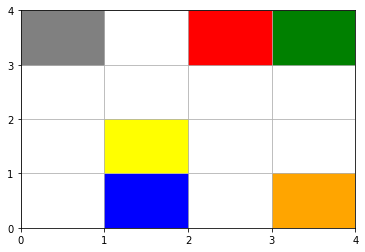

2
actual value 2
{'agent': array([1, 1]), 'target': [3, 3]}
reward 5
total_reward 5


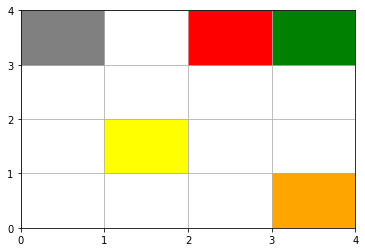

0
actual value 0
{'agent': array([2, 1]), 'target': [3, 3]}
reward 0
total_reward 5


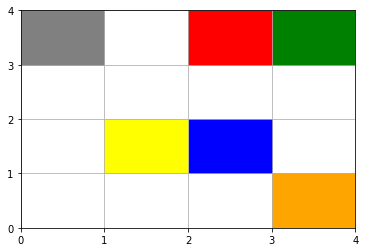

2
actual value 2
{'agent': array([2, 2]), 'target': [3, 3]}
reward 0
total_reward 5


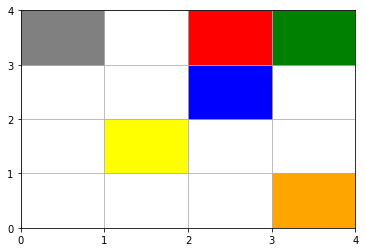

3
actual value 3
{'agent': array([2, 1]), 'target': [3, 3]}
reward 0
total_reward 5


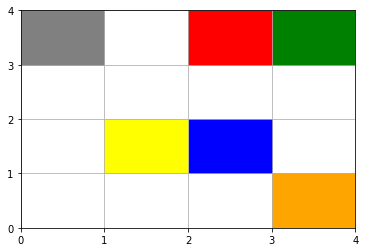

In [ ]:
env = MyGridWorldEnv("stochastic")
agent = RandomAgent(env)

obs, info = env.reset()
env.render(obs)
terminated, truncated = False, False
total_reward = 0
while not terminated:
  action = agent.step(obs)
  print(action)
  obs, reward, terminated, truncated, info = env.step(action)
  total_reward = total_reward + reward
  print(obs)
  print("reward",reward)
  print("total_reward",total_reward)
  env.render(obs)